In [25]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import math
import sklearn.linear_model
%matplotlib inline

from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
data = np.load(r'DATA\MNIST\MINST_DATA.npz')

In [3]:
X_train, y_train, X_test, y_test = data['X_train'], data['y_train'], data['X_test'], data['y_test']

In [4]:
for a in (X_train, y_train, X_test, y_test):
    print(a.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


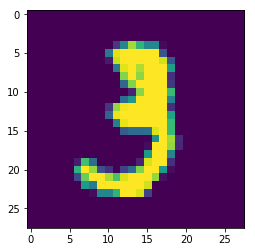

In [5]:
plt.figure()
plt.imshow(X_train[10].reshape(28, 28))

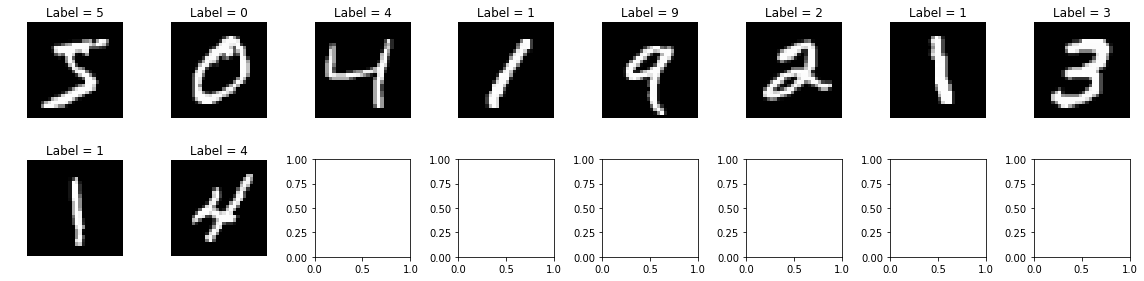

In [7]:
def show_digits(images, labels, ncols=8, w=2, h=2):
    nrows = math.ceil(len(labels)/ncols)
    figsize = (w * ncols, h * nrows)
    fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)    
    for ax, image, label in zip(axs.ravel(), images, labels):
        if image.ndim == 1:      
            n = int(np.sqrt(image.shape[0]))
            image = image.reshape((n, n))
        ax.imshow(image, cmap=mpl.cm.gray)
        ax.set_title(f'Label = {label}')
        ax.axis('off')
    plt.tight_layout()
    
show_digits(X_train[:10], y_train[:10])

(array([5923., 6742., 5958., 6131., 5842., 5421., 5918., 6265., 5851.,
        5949.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

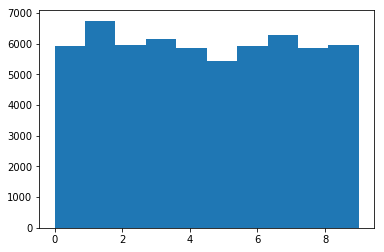

In [8]:
plt.figure()
plt.hist(y_train)

#### simple logistic regression

In [11]:
%%time
clf = LogisticRegression()
clf.fit(X_train[:100], y_train[:100])

Wall time: 17 ms


In [13]:
%%time
clf = LogisticRegression()
clf.fit(X_train[:5000], y_train[:5000])

Wall time: 31.1 s


In [9]:
sizes = [100, 200, 500, 1000, 2000, 3000]
ds = []
for solver in ('lbfgs', 'liblinear', 'sag', 'saga'):
    for size in sizes:
        print(f'{solver} Training with size {size}')
        ts = time.time()
        clf = LogisticRegression(solver=solver)
        clf.fit(X_train[:size], y_train[:size])
        ds.append({'SIZE': size, 'TIME': time.time() - ts, 'SOLVER': solver})


lbfgs Training with size 100
lbfgs Training with size 200
lbfgs Training with size 500
lbfgs Training with size 1000
lbfgs Training with size 2000
lbfgs Training with size 3000
liblinear Training with size 100
liblinear Training with size 200
liblinear Training with size 500
liblinear Training with size 1000
liblinear Training with size 2000
liblinear Training with size 3000
sag Training with size 100


C:\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


sag Training with size 200
sag Training with size 500
sag Training with size 1000
sag Training with size 2000
sag Training with size 3000
saga Training with size 100
saga Training with size 200
saga Training with size 500
saga Training with size 1000
saga Training with size 2000
saga Training with size 3000


Text(0.5,1,'Logistic Regression')

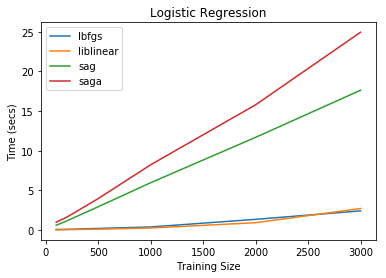

In [17]:
df = pd.DataFrame(ds)
fig, ax = plt.subplots()
for solver, grp in df.groupby('SOLVER'):
    grp.plot(x='SIZE',y='TIME', ax=ax, label=solver)
plt.xlabel('Training Size')
plt.ylabel('Time (secs)')
plt.title('Logistic Regression')

In [28]:
sizes = [100, 200, 500, 1000, 2000, 3000, 10000, 20000]
ds = []
for size in sizes:
    print(f'SGD Training with size {size}')
    ts = time.time()
    clf = SGDClassifier(max_iter=10)
    clf.fit(X_train[:size], y_train[:size])
    ds.append({'SIZE': size, 'TIME': time.time() - ts})
    print('Time = {}'.format(ds[-1]['TIME']))

SGD Training with size 100
Time = 0.008985280990600586
SGD Training with size 200
Time = 0.014994621276855469
SGD Training with size 500
Time = 0.029376745223999023
SGD Training with size 1000
Time = 0.07293534278869629
SGD Training with size 2000
Time = 0.14368534088134766
SGD Training with size 3000
Time = 0.22841262817382812
SGD Training with size 10000
Time = 0.9716892242431641
SGD Training with size 20000
Time = 1.8283281326293945


Text(0.5,1,'Logistic Regression')

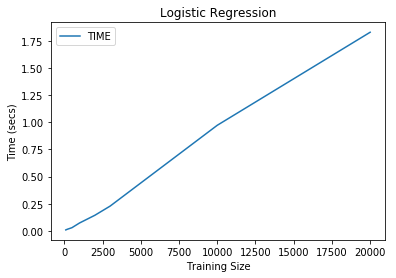

In [29]:
df = pd.DataFrame(ds)
fig, ax = plt.subplots()
df.plot(x='SIZE',y='TIME', ax=ax)
plt.xlabel('Training Size')
plt.ylabel('Time (secs)')
plt.title('Logistic Regression')

In [43]:
%%time
clf = SGDClassifier(max_iter=30)
clf.fit(X_train, y_train)

Wall time: 16.2 s


In [44]:
clf.score(X_test, y_test)

0.8785

In [47]:
def get_accuracy(y_test, y_predict):
    return np.sum(y_test == y_predict)/len(y_predict)

y_predict = clf.predict(X_test)
get_accuracy(y_test, y_predict)

0.8785

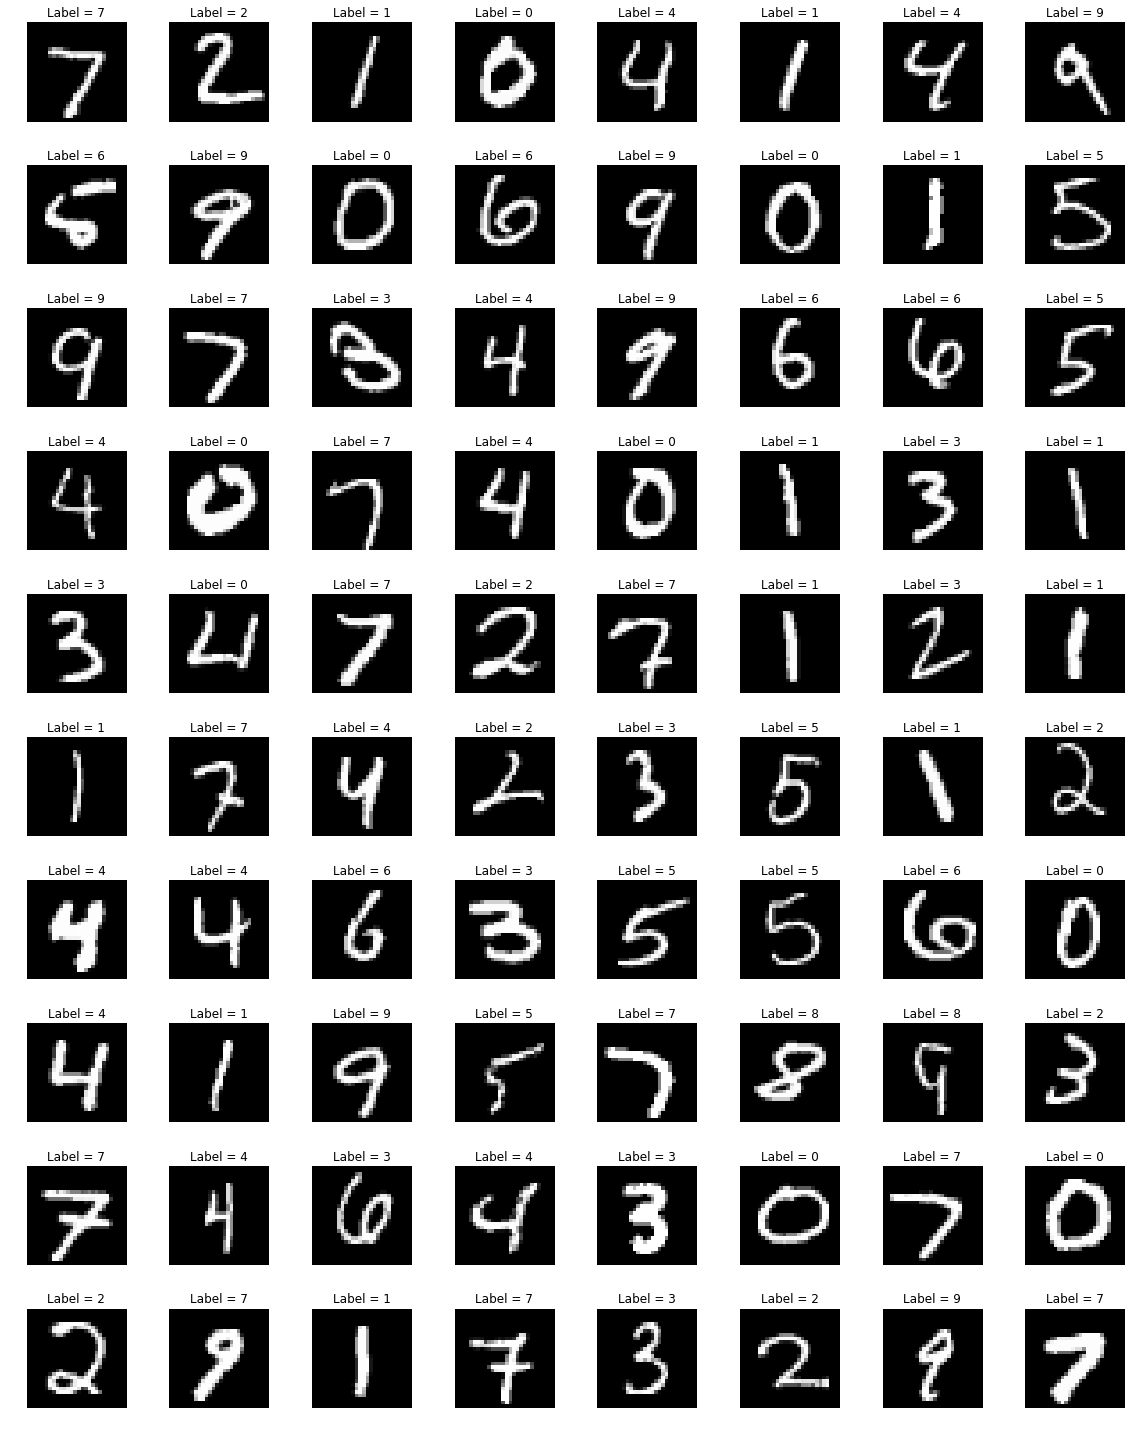

In [49]:
show_digits(X_test[:80], y_predict[:80], ncols=8)

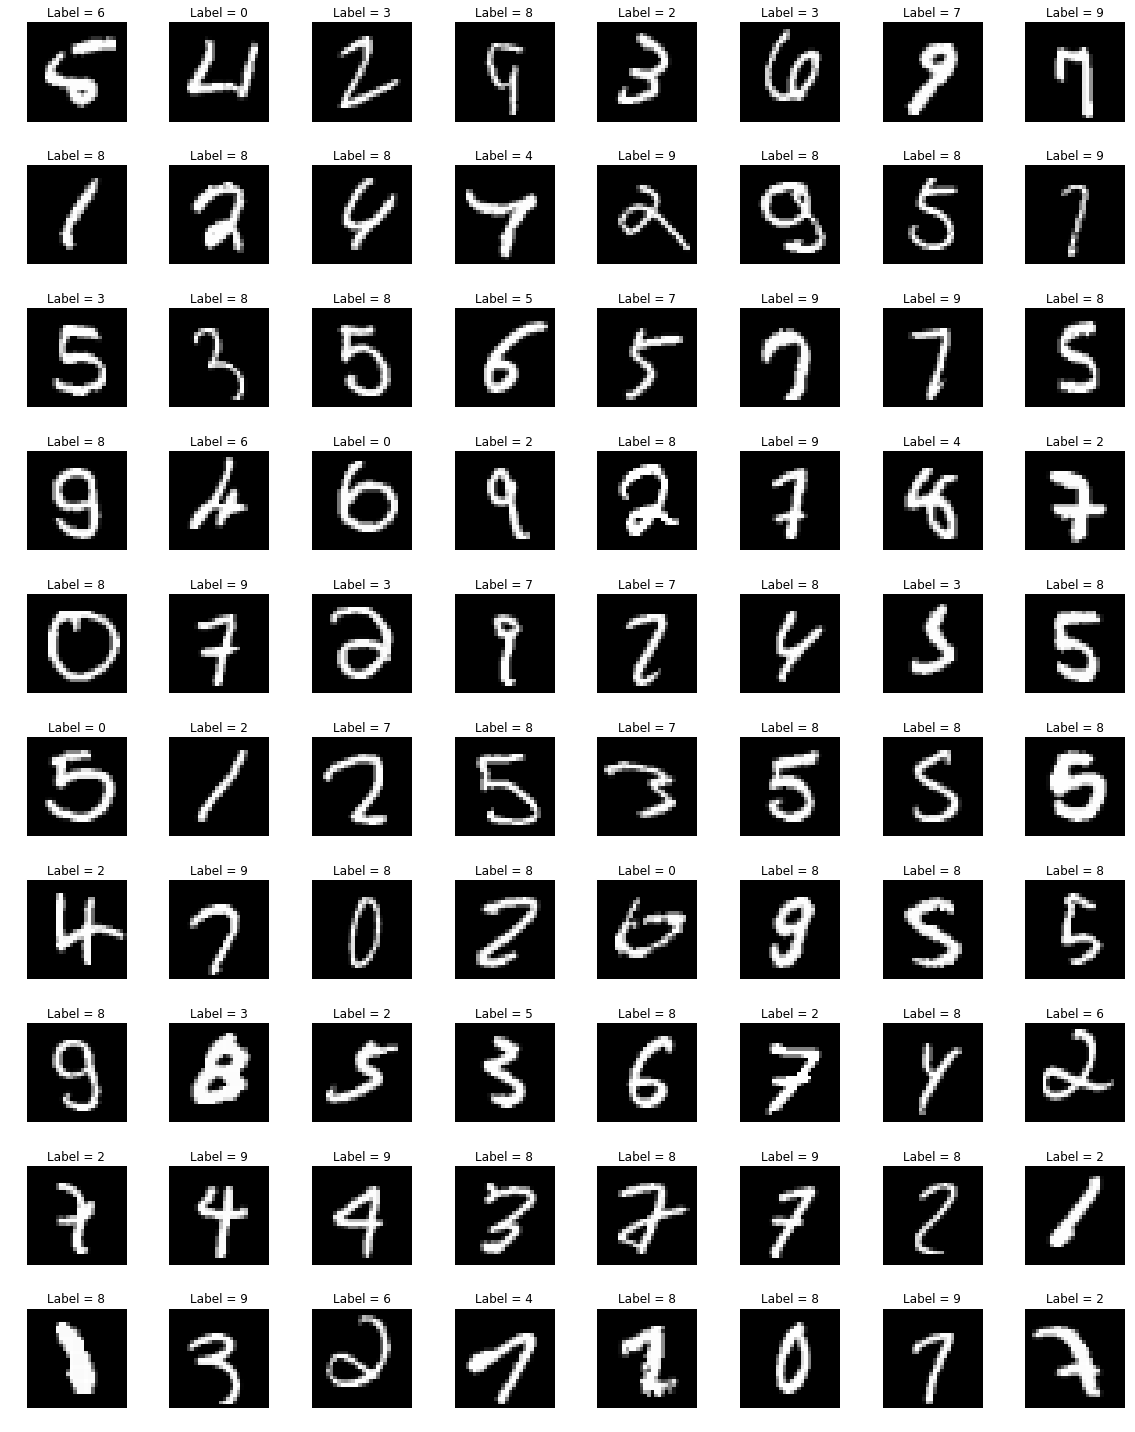

In [55]:
failed_mask = y_test != y_predict
X_failed = X_test[failed_mask]
y_failed = y_predict[failed_mask]

show_digits(X_failed[:80], y_failed[:80], ncols=8)